Universidad del valle de Guatemala  
Dpto. Ciencias de la computacion  
Inteligencia Artificial  
Alberto Suriano  

Laboratorio 2 
Andres Quinto - 18288  

## TASK 1 - Preguntas teóricas

1. ¿Por qué el modelo de Naive Bayes se le considera "naive"?  

    - Se le considera "naive" debido a que el algoritmo asume que la presencia o ausencia de una característica no está influenciada por la presencia o ausencia de otras características en el conjunto de datos. En el problema de SPAM & HAM podemos verlo reflejado en que trata a todas las palabras de igual forma no importa el orden en el que esten en una oracion, esto, debido a que Naive Bayes trata al lenguaje como una bolsa de palabras y cada mensaje siendo una parte random de lo que esta dentro de la bolsa. (Informacion sacada del video de naive bayes del modulo de esta semana)
    [(Naive Bayes, Clearly Explained, 2021)](https://www.youtube.com/watch?v=O2L2Uv9pdDA)   
    
2. Explique la formulación matemática que se busca optimizar en Support Vector Machine, además responda ¿cómo funciona el truco del Kernel para este modelo? (Lo que se espera de esta pregunta es que puedan explicar en sus propias palabras la fórmula a la que llegamos que debemos optimizar de SVM en clase) 
   
    - Lo que trata SVM es mover la data a espacios con mayor dimensiones. Con ello obtenemos dos cosas importantes que son lo que se busca optimizar, un hiperplano y un margen. SVM intenta encontrar un hiperplano que separe de manera óptima las dos clases. El objetivo de la formulación se centra en maximizar el margen entre las clases.  
    
    La definicion del plano, que en este caso es la linea divisoria que nos ayuda a clasificar esta dada por:  
    $$ w^Tx + b = 0  
    $$
    Donde:
    1. w es el vector de pesos.
    2. x es el vector de características.
    3. b es el sesgo.

    La condición de clasificación para un punto de datos es:

    $$ y_i = \text{sign}(w^Tx_i + b)$$

    El objetivo es maximizar el margen, sin embargo, para facilitar la optimización, se minimiza  $$ 1/2 ||w||^2$$ sujeto a restricciones que todos los puntos de datos se clasifique correctamente:
    $$ y_i(w^Tx_i + b) \geq 1, \quad \text{para todo } i$$

    Formulación del Problema de Optimización con Multiplicadores de Lagrange  
    
    - Multiplicadores de Lagrange: Se utilizan para incorporar estas restricciones en la función objetivo.  
    - Función Lagrangiana: Combina la función objetivo y las restricciones, cada una ponderada por un multiplicador de Lagrange.  
    - Minimizar la Lagrangiana: Encontramos: $$ w, b, α $$(multiplicadores de Lagrange) que minimicen la función Lagrangiana.  
    
    Introduciendo los multiplicadores de Lagrange $$( \alpha_i \geq 0 )$$ la función Lagrangiana $$( L ) $$ es:  
    $$[ L(w, b, \alpha) = \frac{1}{2}\|w\|^2 - \sum_{i=1}^n \alpha_i [y_i(w^Tx_i + b) - 1] ]$$  

    Esto es util por que convierte todo nuestro problema en uno de optimización estándar (programación cuadrática), ademas de transformar un problema de optimización con restricciones en uno manejable, permitiendo soluciones óptimas eficientes y aplicables a problemas lineales y no lineales.  
    
    [(Rogers, S., & Girolami, M, 2016)](https://github.com/wwkenwong/book/blob/master/Simon%20Rogers%2C%20Mark%20Girolami%20A%20First%20Course%20in%20Machine%20Learning.pdf)  

3. Investigue sobre Random Forest y responda:  

    a. ¿Qué tipo de ensemble learning es este modelo?  
        Random Forest es un método de aprendizaje ensamble (ensemble learning), también conocido como aprendizaje por agregación (bagging), que combina la salida de múltiples modelos de aprendizaje automático para mejorar la precisión y la robustez del modelo final. En el caso de Random Forest, los modelos individuales son árboles de decisión.  

    b. ¿Cuál es la idea general detrás de Random Forest?  
        Conforme la explicación del video del modulo [(¿Qué es Decision Tree y Random Forest?, 2021)](https://www.youtube.com/watch?v=tYPi6qcCQbg&t=1s).  
        Utilizaban la analogia de que el random forest era como una democracia, donde cada uno de los datasets que se generaban eran el resultado luego de su democracia y a lo macro eran varios forest. La idea central de Random Forest es combinar múltiples árboles de decisión para obtener un modelo más robusto y preciso.  Este proceso aumenta la diversidad entre los árboles, lo que ayuda a mejorar el rendimiento general y reduce el riesgo de sobreajuste, común en los árboles de decisión individuales.  

    c. ¿Por qué se busca baja correlación entre los árboles de Random Forest?  
        La baja correlación entre los árboles de Random Forest ayuda a reducir el sesgo y el sobreajuste. Si los árboles de decisión están altamente correlacionados, es probable que aprendan los mismos patrones y, por lo tanto, sean más propensos al sesgo y al sobreajuste.  
[(Random Forests, 2001)](https://link.springer.com/article/10.1023/A:1010933404324)  
[(¿Qué es Decision Tree y Random Forest?, 2021)](https://www.youtube.com/watch?v=tYPi6qcCQbg&t=1s)   

## Task 2 - Naive Bayes: Clasificador de Mensajes Ham/Spam

### TASK 2.1

In [9]:
## LIMPIEZA DEL DATASET
import re
from sklearn.model_selection import train_test_split
from collections import defaultdict
from math import log

def clean_dataset():
    """
    Cleans the dataset by removing special characters, converting text to lowercase,
    splitting the dataset by newline character, and processing each observation.
    Returns the processed observations.
    """
    # Read the dataset file
    with open("entrenamiento.txt", "r") as file:
        dataset = file.read()

    # Remove special characters
    clean_dataset = re.sub(r"[^a-zA-Z0-9\s]", "", dataset)

    # Convert text to lowercase
    clean_dataset = clean_dataset.lower()

    # Split the cleaned dataset by newline character
    observations = clean_dataset.split("\n")

    # Process each observation
    processed_observations = []
    for observation in observations:
        # Split the observation by tab character
        parts = observation.split("\t")
        if len(parts) >= 2:
            label = parts[0]  # Extract the label
            message = "\t".join(parts[1:])  # Extract the message
            processed_observations.append((label, message))

    return processed_observations

# # Print the processed observations in the format specified Label and Message
# for label, message in clean_dataset():
#     print(f"Label: {label}\tMessage: {message}")

# Divide el dataset en conjuntos de entrenamiento y prueba en una proporcion de 20 para test y 80 para entrenamiento
train_set, test_set = train_test_split(clean_dataset(), test_size=0.2, train_size=0.8, random_state=42)


## Task 2.2 - Construcción del modelo


In [10]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import seaborn as sns

###BAYES NAIVE MODEL
# Ejemplo trivial de bayes: https://www.datacamp.com/tutorial/naive-bayes-scikit-learn
def train_naive_bayes(train_set):
    """
    Trains a Naive Bayes model with Laplace smoothing using the training set.
    
    Args:
        train_set (list): A list of tuples containing the label and message for each training example.
        
    Returns:
        tuple: A tuple containing the trained model parameters:
            - word_probs_spam (dict): A dictionary mapping each word to its probability of occurring in spam messages.
            - word_probs_ham (dict): A dictionary mapping each word to its probability of occurring in ham messages.
            - prior_spam (float): The prior probability of a message being spam.
            - prior_ham (float): The prior probability of a message being ham.
            - vocab_size (int): The size of the vocabulary (unique words in both spam and ham messages).
            - total_words_ham (int): The total number of words in ham messages.
            - total_words_spam (int): The total number of words in spam messages.
    """
    # Count the occurrences of each word in spam and ham messages
    word_counts_spam = defaultdict(int)
    word_counts_ham = defaultdict(int)
    total_words_spam = 0
    total_words_ham = 0

    for label, message in train_set:
        words = re.findall(r'\w+', message)  # Extract words from the message
        if label == 'spam':
            for word in words:
                word_counts_spam[word] += 1
                total_words_spam += 1
        else:
            for word in words:
                word_counts_ham[word] += 1
                total_words_ham += 1

    # Calculate the probabilities of each word occurring in spam and ham messages
    word_probs_spam = defaultdict(float)
    word_probs_ham = defaultdict(float)

    for word, count in word_counts_spam.items():
        word_probs_spam[word] = (count + 1) / (total_words_spam + len(word_counts_spam))

    for word, count in word_counts_ham.items():
        word_probs_ham[word] = (count + 1) / (total_words_ham + len(word_counts_ham))

    # Calculate the prior probabilities of spam and ham
    total_messages = len(train_set)
    spam_messages = sum(1 for label, _ in train_set if label == 'spam')
    ham_messages = total_messages - spam_messages
    prior_spam = spam_messages / total_messages
    prior_ham = ham_messages / total_messages
    # Calculate vocabulary size (unique words in both spam and ham)
    vocab_size = len(set(word_counts_spam.keys()).union(set(word_counts_ham.keys())))

    # Return the trained model
    return word_probs_spam, word_probs_ham, prior_spam, prior_ham, vocab_size, total_words_ham, total_words_spam

def classify_message(message, word_probs_spam, word_probs_ham, prior_spam, prior_ham, vocab_size, total_words_ham, total_words_spam):
    """
    Classifies a message as spam or ham using the trained Naive Bayes model.
    Returns the predicted label.
    """
    words = re.findall(r'\w+', message)

    log_likelihood_spam = 0
    log_likelihood_ham = 0

    for word in words:
        # Using Laplace smoothing for unseen words
        prob_spam = word_probs_spam.get(word, 1 / (total_words_spam + vocab_size))
        prob_ham = word_probs_ham.get(word, 1 / (total_words_ham + vocab_size))

        log_likelihood_spam += log(prob_spam)
        log_likelihood_ham += log(prob_ham)

    log_posterior_spam = log_likelihood_spam + log(prior_spam)
    log_posterior_ham = log_likelihood_ham + log(prior_ham)

    return 'spam' if log_posterior_spam > log_posterior_ham else 'ham'

############################################################################################################
# Train the Naive Bayes model
word_probs_spam, word_probs_ham, prior_spam, prior_ham, vocab_size, total_words_ham, total_words_spam = train_naive_bayes(train_set)

# Create empty lists to store the predicted labels and true labels
train_predicted_labels = []
train_true_labels = []
test_predicted_labels = []
test_true_labels = []

# Classify the messages in the train_set and test_set
for label, message in train_set:
    train_predicted_labels.append(classify_message(message, word_probs_spam, word_probs_ham, prior_spam, prior_ham, vocab_size, total_words_ham, total_words_spam))
    train_true_labels.append(label)

for label, message in test_set:
    test_predicted_labels.append(classify_message(message, word_probs_spam, word_probs_ham, prior_spam, prior_ham, vocab_size, total_words_ham, total_words_spam))
    test_true_labels.append(label)

# Calculate precision, recall, and confusion matrix for train_set
train_precision = precision_score(train_true_labels, train_predicted_labels, average='weighted')
train_recall = recall_score(train_true_labels, train_predicted_labels, average='weighted')
train_confusion_matrix = confusion_matrix(train_true_labels, train_predicted_labels)

# Calculate precision, recall, and confusion matrix for test_set
test_precision = precision_score(test_true_labels, test_predicted_labels, average='weighted')
test_recall = recall_score(test_true_labels, test_predicted_labels, average='weighted')
test_confusion_matrix = confusion_matrix(test_true_labels, test_predicted_labels)

train_precision, train_recall, train_confusion_matrix, test_precision, test_recall, test_confusion_matrix



(0.9913812691002051,
 0.9912398921832885,
 array([[3841,   27],
        [  12,  572]], dtype=int64),
 0.9777943059681852,
 0.9748427672955975,
 array([[924,  26],
        [  2, 161]], dtype=int64))

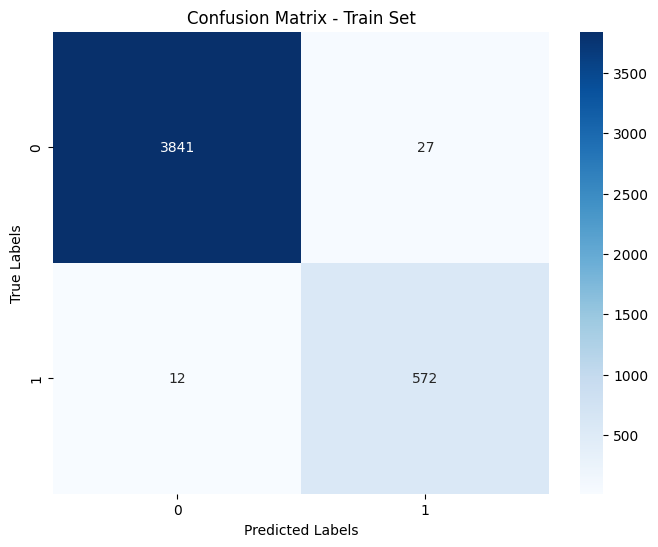

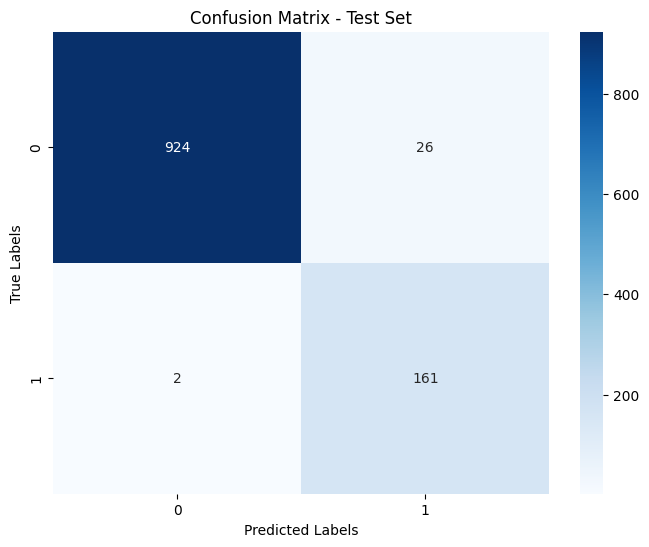

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix for train_set
plt.figure(figsize=(8, 6))
sns.heatmap(train_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Train Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot the confusion matrix for test_set
plt.figure(figsize=(8, 6))
sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### Justificacion de metricas:

1. Precisión es una métrica importante para evaluar el desempeño de un modelo de clasificación cuando es importante evitar falsos positivos. En el caso de la clasificación de mensajes HAM/SPAM, un falso positivo sería un mensaje que es clasificado erróneamente como SPAM. Esto podría resultar en que los usuarios pierdan mensajes importantes o que sean molestados por mensajes no deseados. Por lo tanto, es importante que el modelo tenga una precisión alta para minimizar la probabilidad de falsos positivos.

2. Recall es otra métrica importante para evaluar el desempeño de un modelo de clasificación cuando es importante evitar falsos negativos. En el caso de la clasificación de mensajes HAM/SPAM, un falso negativo sería un mensaje que es clasificado erróneamente como HAM. Esto podría resultar en que los usuarios no reciban alertas importantes o que sean víctimas de ataques de phishing. Por lo tanto, es importante que el modelo tenga un recall alto para minimizar la probabilidad de falsos negativos.

3. La matriz de confusión proporciona una visión general de la distribución de las predicciones correctas e incorrectas del modelo. Esta información puede ser útil para identificar patrones de error y posibles sesgos en el modelo. En el caso de la clasificación de mensajes HAM/SPAM, la matriz de confusión puede ayudar a identificar qué tipos de mensajes son más propensos a ser mal clasificados.

In [16]:
from math import exp, log
def classify_and_get_probability(message, word_probs_spam, word_probs_ham, prior_spam, prior_ham, vocab_size, total_words_ham, total_words_spam):
    """
    Classifies a message as spam or ham using the trained Naive Bayes model and returns the probability.
    """
    words = re.findall(r'\w+', message)

    log_likelihood_spam = 0
    log_likelihood_ham = 0

    for word in words:
        # Using Laplace smoothing for unseen words
        prob_spam = word_probs_spam.get(word, 1 / (total_words_spam + vocab_size))
        prob_ham = word_probs_ham.get(word, 1 / (total_words_ham + vocab_size))

        log_likelihood_spam += log(prob_spam)
        log_likelihood_ham += log(prob_ham)

    # Calculate the log-posteriors
    log_posterior_spam = log_likelihood_spam + log(prior_spam)
    log_posterior_ham = log_likelihood_ham + log(prior_ham)

    # Convert log-posteriors to probabilities
    probability_spam = exp(log_posterior_spam) / (exp(log_posterior_spam) + exp(log_posterior_ham))
    probability_ham = exp(log_posterior_ham) / (exp(log_posterior_spam) + exp(log_posterior_ham))

    label = 'spam' if log_posterior_spam > log_posterior_ham else 'ham'
    return label, probability_spam, probability_ham

# Example user input
user_input = input("Enter a message to classify: ")

# Classify the user input message
label, probability_spam, probability_ham = classify_and_get_probability(user_input, word_probs_spam, word_probs_ham, prior_spam, prior_ham, vocab_size, total_words_ham, total_words_spam)

print(f"Message: '{user_input}' is classified as {label}.")
print(f"Probability of being Spam: {probability_spam*100:.2f}%")
print(f"Probability of being Ham: {probability_ham*100:.2f}%")


Message: 'This is the 2nd time we have tried 2 contact u' is classified as spam.
Probability of being Spam: 99.31%
Probability of being Ham: 0.69%


### TASK 2.4 COMPARACION DE LIBRERIAS